In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

C:\Users\COM\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**SEMMA Methodology**

**Sample and Loading Datasets**

In [2]:
emissions_data = pd.read_csv("annual-co2-emissions-per-country.csv")
source_data = pd.read_csv("co2-by-source.csv")
# Filter data for selected countries
selected_countries = ["United Kingdom", "United States", "France", "Germany"]
emissions_data = emissions_data[emissions_data['Entity'].isin(selected_countries)]
source_data = source_data[source_data['Entity'].isin(selected_countries)]
emissions_data = emissions_data.rename(columns={'Annual CO₂ emissions': 'Annual CO2 emissions'})
source_data = source_data.rename(columns={
    'Annual CO₂ emissions from other industry': 'Annual CO2 emissions from other industry',
    'Annual CO₂ emissions from flaring': 'Annual CO2 emissions from flaring',
    'Annual CO₂ emissions from cement': 'Annual CO2 emissions from cement',
    'Annual CO₂ emissions from gas': 'Annual CO2 emissions from gas',
    'Annual CO₂ emissions from oil': 'Annual CO2 emissions from oil',
    'Annual CO₂ emissions from coal': 'Annual CO2 emissions from coal'
})
# Merge datasets on common columns (Entity, Code, Year)
merged_data = pd.merge(emissions_data, source_data, on=['Entity', 'Code', 'Year'], how='inner')
merged_data.head(5)

,Entity,Code,Year,Annual CO2 emissions,Annual CO2 emissions from other industry,Annual CO2 emissions from flaring,Annual CO2 emissions from cement,Annual CO2 emissions from gas,Annual CO2 emissions from oil,Annual CO2 emissions from coal
0,France,FRA,1802,2238704.0,NaN,0.0,NaN,0.0,0.0,2238704.0
1,France,FRA,1804,2176416.0,NaN,0.0,NaN,0.0,0.0,2176416.0
2,France,FRA,1810,2121456.0,NaN,0.0,NaN,0.0,0.0,2121456.0
3,France,FRA,1811,2051840.1,NaN,0.0,NaN,0.0,0.0,2051840.1
4,France,FRA,1812,2216720.0,NaN,0.0,NaN,0.0,0.0,2216720.0


**Exploring the Data**

In [3]:
# Displaying basic statistics and information about the datasets
print("Emissions Data:")
print(emissions_data.info())
print(emissions_data.describe())

print("\nSource Data:")
print(source_data.info())
print(source_data.describe())

# Exploring the structure of the merged dataset
print("\nMerged Data:")
print(merged_data.info())
print(merged_data.describe())


Emissions Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 10550 to 29948
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                938 non-null    object 
 1   Code                  938 non-null    object 
 2   Year                  938 non-null    int64  
 3   Annual CO2 emissions  938 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.6+ KB
None
              Year  Annual CO2 emissions
count   938.000000          9.380000e+02
mean   1903.170576          6.746395e+08
std      69.671272          1.247073e+09
min    1750.000000          2.528160e+05
25%    1846.000000          3.535119e+07
50%    1904.000000          2.709968e+08
75%    1963.000000          5.713926e+08
max    2021.000000          6.137604e+09

Source Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 9690 to 28056
Data columns (total 9 columns):
 #   Col

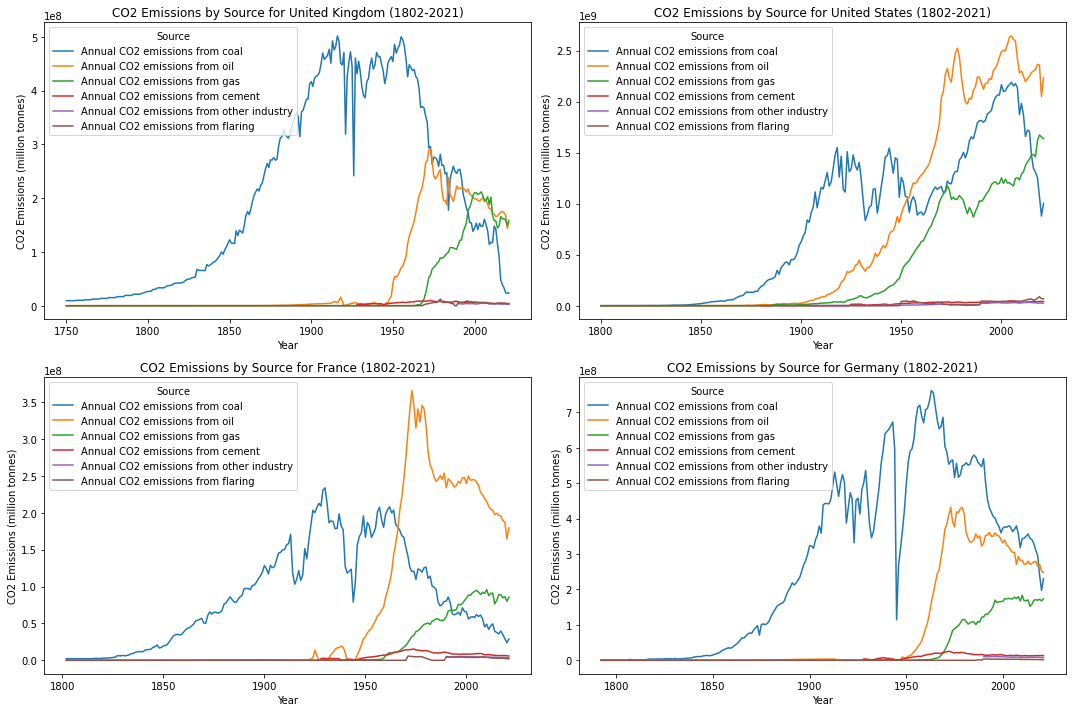

In [4]:
# Creating a subplot for each country
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flattening the axes array
axs = axs.flatten()


for ax, country in zip(axs, selected_countries):

    country_data = merged_data[merged_data['Entity'] == country]


    country_melted = country_data.melt(id_vars=['Entity', 'Code', 'Year', 'Annual CO2 emissions'],
                                       value_vars=['Annual CO2 emissions from coal', 'Annual CO2 emissions from oil',
                                                   'Annual CO2 emissions from gas', 'Annual CO2 emissions from cement',
                                                   'Annual CO2 emissions from other industry', 'Annual CO2 emissions from flaring'],
                                       var_name='Source', value_name='Emissions')


    sns.lineplot(data=country_melted, x='Year', y='Emissions', hue='Source', ax=ax)
    ax.set_title(f'CO2 Emissions by Source for {country} (1802-2021)')
    ax.set_ylabel('CO2 Emissions (million tonnes)')


plt.tight_layout()
plt.show()


**Modify The Data**

In [5]:
print("Missing Values:")
print(merged_data.isnull().sum())

Missing Values:
Entity                                        0
Code                                          0
Year                                          0
Annual CO2 emissions                          0
Annual CO2 emissions from other industry    724
Annual CO2 emissions from flaring             0
Annual CO2 emissions from cement            516
Annual CO2 emissions from gas                 0
Annual CO2 emissions from oil                 0
Annual CO2 emissions from coal                0
dtype: int64


In [6]:
merged_data = merged_data.fillna(0)

In [7]:
print("Duplicate Rows:")
print(merged_data.duplicated().sum())

Duplicate Rows:
0


In [8]:
merged_data.head(5)

,Entity,Code,Year,Annual CO2 emissions,Annual CO2 emissions from other industry,Annual CO2 emissions from flaring,Annual CO2 emissions from cement,Annual CO2 emissions from gas,Annual CO2 emissions from oil,Annual CO2 emissions from coal
0,France,FRA,1802,2238704.0,0.0,0.0,0.0,0.0,0.0,2238704.0
1,France,FRA,1804,2176416.0,0.0,0.0,0.0,0.0,0.0,2176416.0
2,France,FRA,1810,2121456.0,0.0,0.0,0.0,0.0,0.0,2121456.0
3,France,FRA,1811,2051840.1,0.0,0.0,0.0,0.0,0.0,2051840.1
4,France,FRA,1812,2216720.0,0.0,0.0,0.0,0.0,0.0,2216720.0


**Model**

Checking For Seasonality

In [9]:
merged_data['Year'] = pd.to_datetime(merged_data['Year'], format='%Y')

# Set 'Year' as the index
merged_data.set_index('Year', inplace=True)

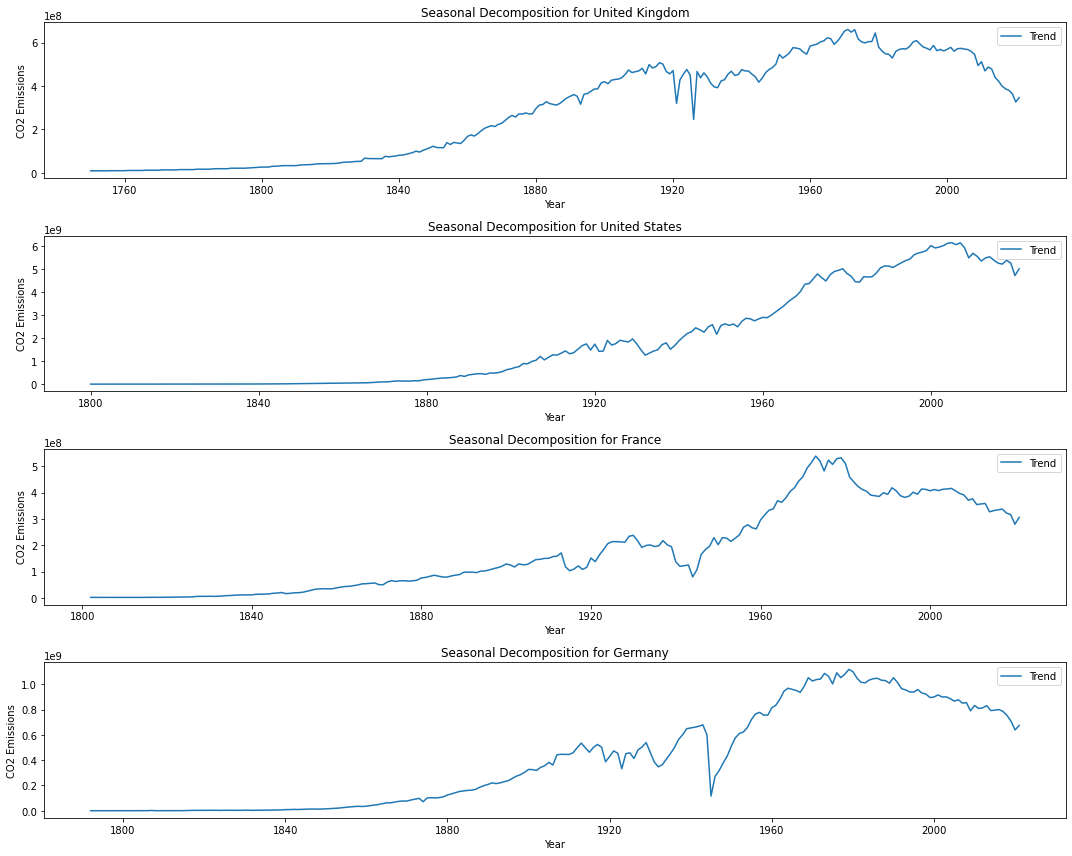

In [10]:
plt.figure(figsize=(15, 12))

for i, country in enumerate(selected_countries, 1):
    plt.subplot(4, 1, i)

    country_data = merged_data[merged_data['Entity'] == country]['Annual CO2 emissions']

    # Specifying the frequency
    result = seasonal_decompose(country_data, model='multiplicative', period=1, extrapolate_trend='freq')

    # Plot trend

    plt.plot(result.trend, label='Trend')


    plt.title(f'Seasonal Decomposition for {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.legend()

plt.tight_layout()
plt.show()

Calculating the proportion of total emissions that each source contributes

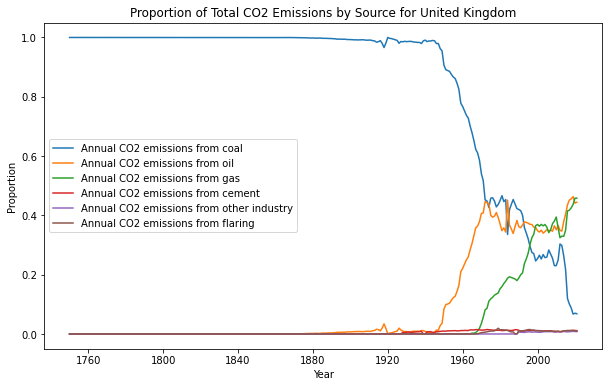

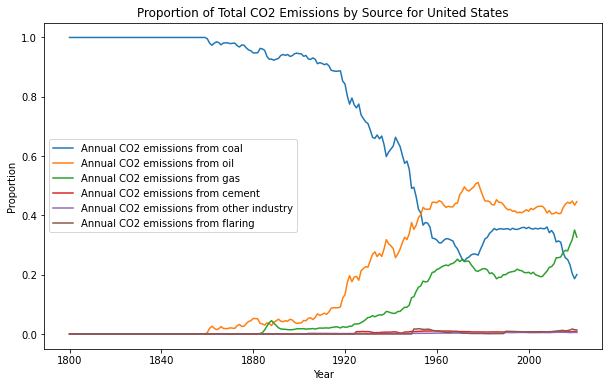

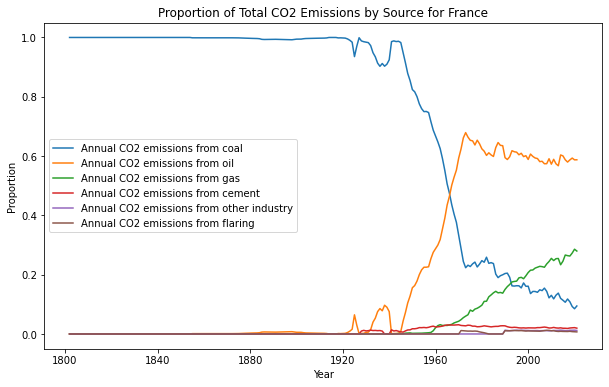

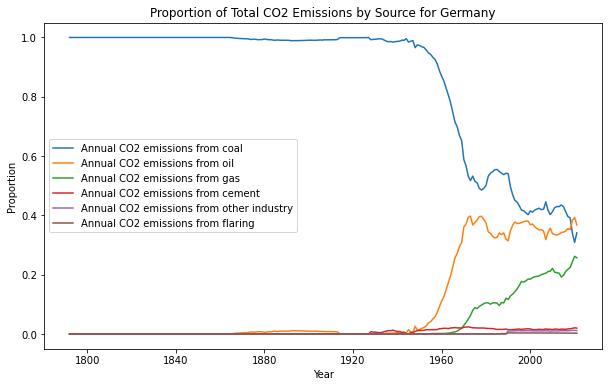

In [11]:

for source in ['Annual CO2 emissions from coal', 'Annual CO2 emissions from oil',
               'Annual CO2 emissions from gas', 'Annual CO2 emissions from cement',
               'Annual CO2 emissions from other industry', 'Annual CO2 emissions from flaring']:
    merged_data[source] = merged_data[source] / merged_data['Annual CO2 emissions']


for country in selected_countries:
    plt.figure(figsize=(10, 6))
    for source in ['Annual CO2 emissions from coal', 'Annual CO2 emissions from oil',
                   'Annual CO2 emissions from gas', 'Annual CO2 emissions from cement',
                   'Annual CO2 emissions from other industry', 'Annual CO2 emissions from flaring']:
        plt.plot(merged_data[merged_data['Entity'] == country].index, merged_data[merged_data['Entity'] == country][source], label=source)
    plt.title(f'Proportion of Total CO2 Emissions by Source for {country}')
    plt.xlabel('Year')
    plt.ylabel('Proportion')
    plt.legend()
    plt.show()


Checking For the Impact of Sources of CO2 on the Emission of the Country

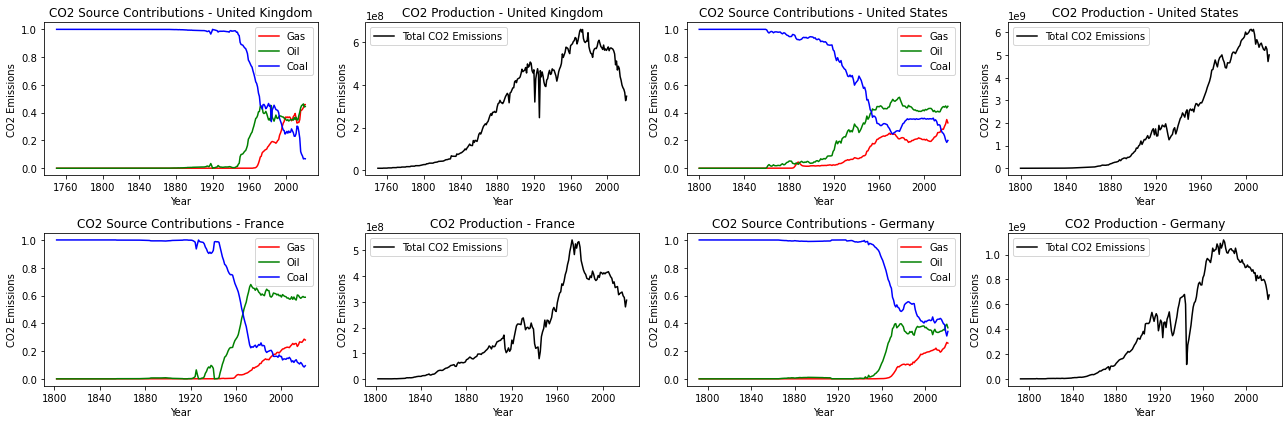

In [12]:
plt.figure(figsize=(18, 6))

for i, country in enumerate(selected_countries, 1):
    plt.subplot(2, 4, i * 2 - 1)

    country_data = merged_data[merged_data['Entity'] == country]

    # Plot CO2 source contributions
    sns.lineplot(x=country_data.index, y=country_data['Annual CO2 emissions from gas'], label='Gas', color='red')
    sns.lineplot(x=country_data.index, y=country_data['Annual CO2 emissions from oil'], label='Oil', color='green')
    sns.lineplot(x=country_data.index, y=country_data['Annual CO2 emissions from coal'], label='Coal', color='blue')

    plt.title(f'CO2 Source Contributions - {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.legend(loc='upper right')

    plt.subplot(2, 4, i * 2)

    # Plot CO2 production
    sns.lineplot(x=country_data.index, y=country_data['Annual CO2 emissions'], label='Total CO2 Emissions', color='black')

    plt.title(f'CO2 Production - {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Cumulative Contribution of The major sources for CO2 emission

Highest Contributor for United Kingdom: Cumulative Coal


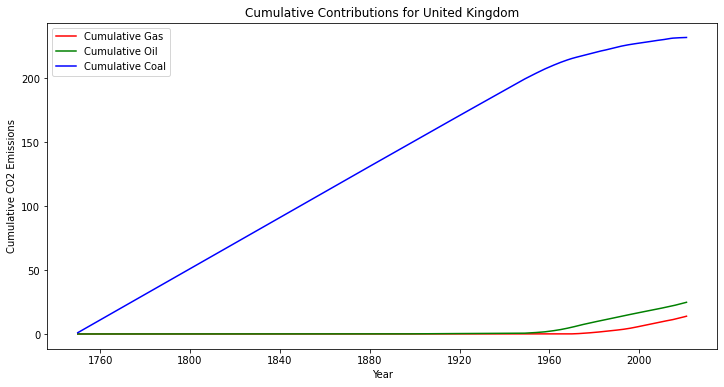

Highest Contributor for United States: Cumulative Coal


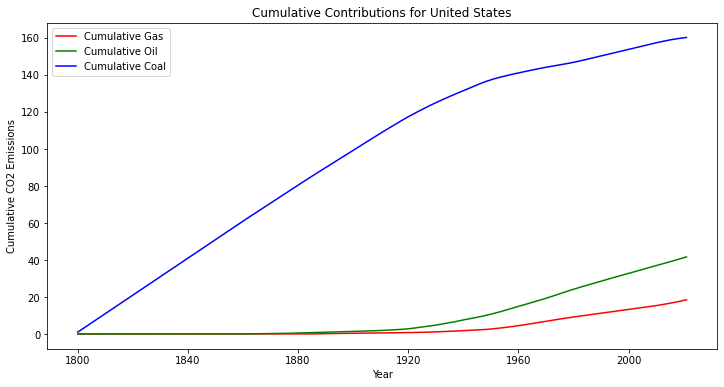

Highest Contributor for France: Cumulative Coal


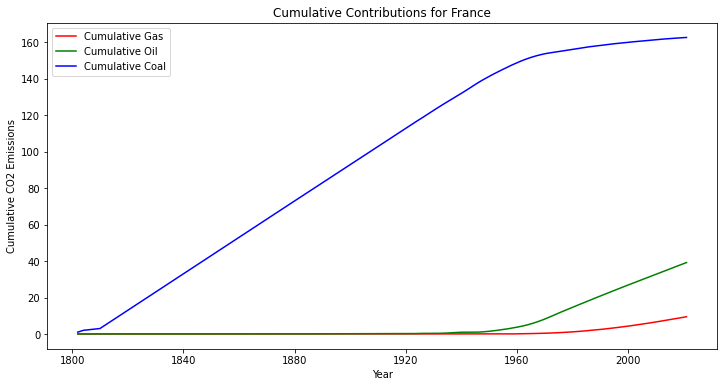

Highest Contributor for Germany: Cumulative Coal


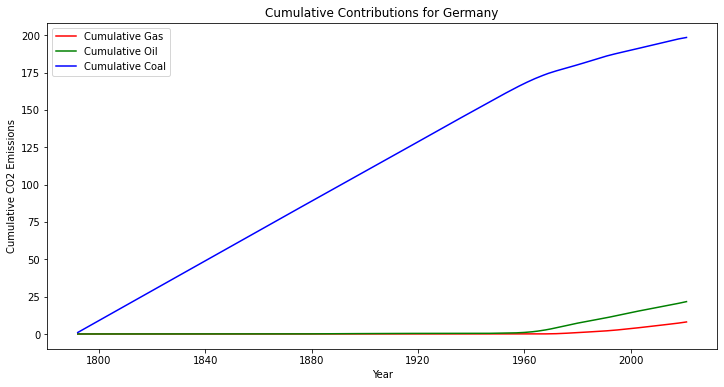

In [13]:
for country in selected_countries:
    country_data = merged_data[merged_data['Entity'] == country]

    # Calculating cumulative contributions for each CO2 source
    country_data['Cumulative Gas'] = country_data['Annual CO2 emissions from gas'].cumsum()
    country_data['Cumulative Oil'] = country_data['Annual CO2 emissions from oil'].cumsum()
    country_data['Cumulative Coal'] = country_data['Annual CO2 emissions from coal'].cumsum()

    # Identifying the source with the highest cumulative contribution
    highest_contributor = country_data[['Cumulative Gas', 'Cumulative Oil', 'Cumulative Coal']].idxmax(axis=1)


    plt.figure(figsize=(12, 6))

    sns.lineplot(x=country_data.index, y=country_data['Cumulative Gas'], label='Cumulative Gas', color='red')
    sns.lineplot(x=country_data.index, y=country_data['Cumulative Oil'], label='Cumulative Oil', color='green')
    sns.lineplot(x=country_data.index, y=country_data['Cumulative Coal'], label='Cumulative Coal', color='blue')

    plt.title(f'Cumulative Contributions for {country}')
    plt.xlabel('Year')
    plt.ylabel('Cumulative CO2 Emissions')
    plt.legend()


    print(f'Highest Contributor for {country}: {highest_contributor.value_counts().idxmax()}')

    plt.show()

Checking for the Time Periods and their respective Major Contributors towards CO2 emission

United Kingdom (1850-1900) - Highest Contributor: Cumulative Coal
United Kingdom (1900-1950) - Highest Contributor: Cumulative Coal
United Kingdom (1950-2020) - Highest Contributor: Cumulative Coal


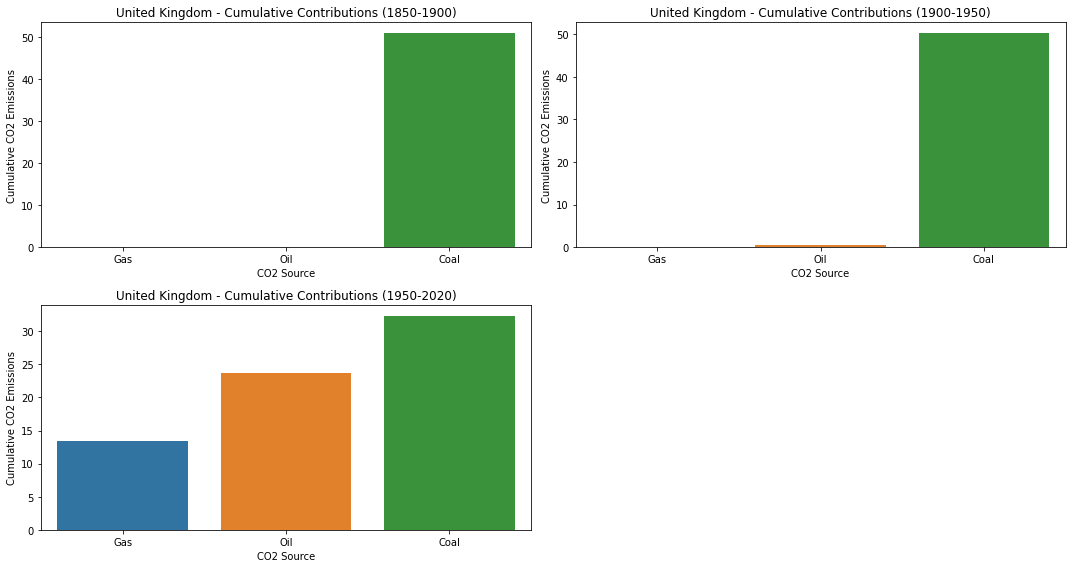

United States (1850-1900) - Highest Contributor: Cumulative Coal
United States (1900-1950) - Highest Contributor: Cumulative Coal
United States (1950-2020) - Highest Contributor: Cumulative Oil


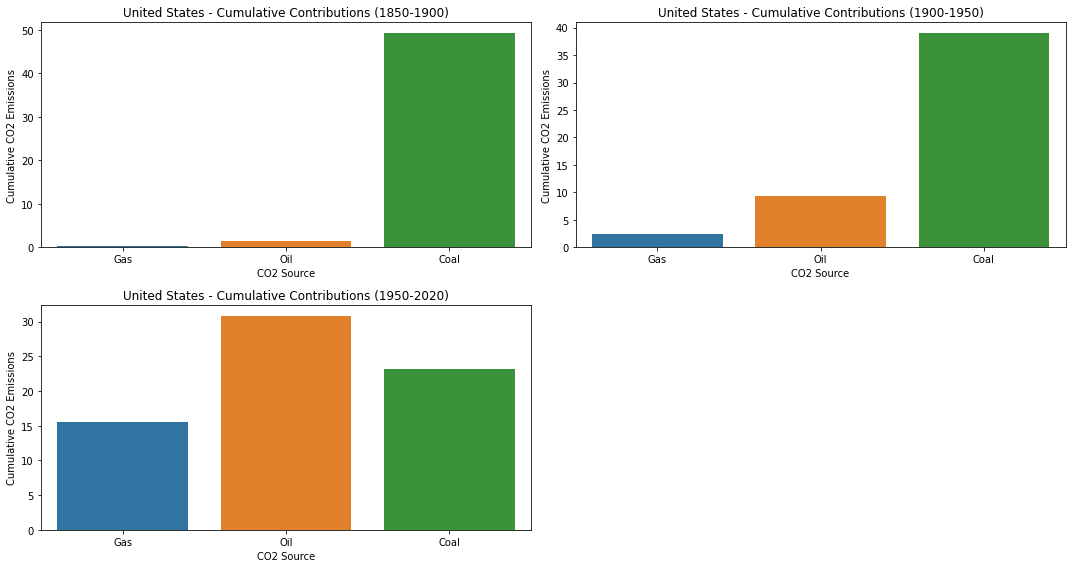

France (1850-1900) - Highest Contributor: Cumulative Coal
France (1900-1950) - Highest Contributor: Cumulative Coal
France (1950-2020) - Highest Contributor: Cumulative Oil


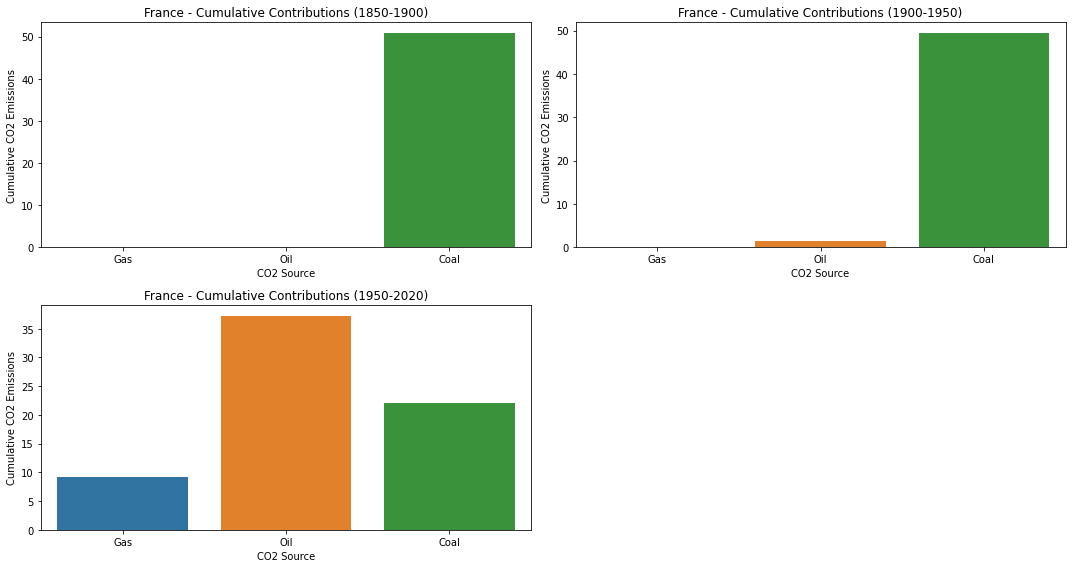

Germany (1850-1900) - Highest Contributor: Cumulative Coal
Germany (1900-1950) - Highest Contributor: Cumulative Coal
Germany (1950-2020) - Highest Contributor: Cumulative Coal


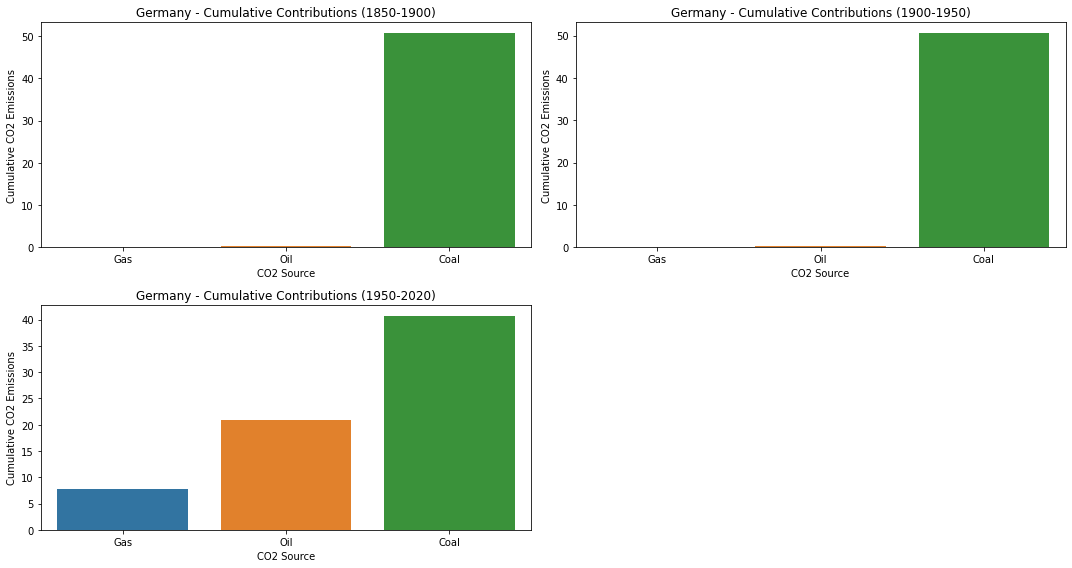

In [14]:
# Defining the time periods
periods = [(1850, 1900), (1900, 1950), (1950, 2020)]

# Performing path analysis for each country and each period
for country in selected_countries:
    country_data = merged_data[merged_data['Entity'] == country]

    plt.figure(figsize=(15, 8))

    for i, period in enumerate(periods, 1):
        start_year, end_year = period
        period_data = country_data.loc[(country_data.index.year >= start_year) & (country_data.index.year <= end_year)]


        period_data['Cumulative Gas'] = period_data['Annual CO2 emissions from gas'].sum()
        period_data['Cumulative Oil'] = period_data['Annual CO2 emissions from oil'].sum()
        period_data['Cumulative Coal'] = period_data['Annual CO2 emissions from coal'].sum()

        # Identifying the source with the highest cumulative contribution for the period
        highest_contributor = period_data[['Cumulative Gas', 'Cumulative Oil', 'Cumulative Coal']].idxmax(axis=1).iloc[0]


        plt.subplot(2, 2, i)
        sns.barplot(x=['Gas', 'Oil', 'Coal'], y=period_data[['Cumulative Gas', 'Cumulative Oil', 'Cumulative Coal']].iloc[0])

        plt.title(f'{country} - Cumulative Contributions ({start_year}-{end_year})')
        plt.xlabel('CO2 Source')
        plt.ylabel('Cumulative CO2 Emissions')


        print(f'{country} ({start_year}-{end_year}) - Highest Contributor: {highest_contributor}')

    plt.tight_layout()
    plt.show()

Creating a Statistical Path analysis

In [17]:
import statsmodels.api as sm
# Defining the endogenous variable (dependent variable)
endog = merged_data['Annual CO2 emissions']

# Defining the exogenous variables (independent variables)
exog = merged_data[['Annual CO2 emissions from gas', 'Annual CO2 emissions from oil', 'Annual CO2 emissions from coal']]


exog = sm.add_constant(exog)

# Fit the model
model = sm.OLS(endog, exog).fit()

# Print the model summary
print(model.summary())

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
merged_data.tail()

Time series Prediction for next 20 years fo CO2 emission

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Defining a function to perform ARIMA forecasting
def arima_forecast(series, order=(3, 0, 2), forecast_steps=20):
    try:
        model = ARIMA(series, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=forecast_steps)
        return model_fit, forecast
    except Exception as e:
        print(f"Error during model fitting for {series.name}: {e}")
        return None, None

# Defining the forecast horizon
forecast_horizon = 20

# Performing forecasting and plot for each country
for country in selected_countries:
    print(f"\n{country}:")
    country_data = merged_data[merged_data['Entity'] == country]['Annual CO2 emissions']
    model_fit, forecast = arima_forecast(country_data, forecast_steps=forecast_horizon)

    if model_fit is not None:
        forecast.index = pd.date_range(start='2021', periods=forecast_horizon, freq='A')


        plt.figure(figsize=(10, 6))
        plt.plot(country_data.index, country_data, label='Original')
        plt.plot(forecast.index, forecast, label='Forecast')
        plt.title(f'Annual CO2 Emissions Forecast for {country}')
        plt.xlabel('Year')
        plt.ylabel('CO2 Emissions')
        plt.legend()
        plt.show()


        print(model_fit.summary())


**Business Trend Of Electircal vehicles since 2010**

In [ ]:
ev_data = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")
ev_data.head(5)

In [ ]:
ev_data.info()

In [ ]:
filtered_ev_data = ev_data[
    (ev_data['region'].isin(['Germany', 'France', 'USA', 'United Kingdom'])) &
    (ev_data['unit'] == 'Vehicles') &
    (ev_data['powertrain'] == 'BEV') &
    (ev_data['parameter'] == 'EV sales')
]


filtered_ev_data.head()

In [ ]:
import plotly.express as px


fig = px.line(filtered_ev_data, x='year', y='value', color='region',
              labels={'value': 'Number of Vehicles Sold', 'year': 'Year'},
              title='BEV Vehicle Sales Over Time',
              line_group='region',
              width=800, height=500)


fig.show()

In [ ]:
total_ev_stock = filtered_ev_data.groupby(['region', 'year'])['value'].sum().reset_index()

fig = go.Figure()

for country in total_ev_stock['region'].unique():
    country_data = total_ev_stock[total_ev_stock['region'] == country]
    fig.add_trace(go.Bar(x=country_data['year'], y=country_data['value'],
                        name=country))


fig.update_layout(barmode='group',
                  title='Total EV Stock Over Time',
                  xaxis_title='Year',
                  yaxis_title='Total EV Stock',
                  width=800, height=500)


fig.show()

**Future Forecast of BEV**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


regression_model = LinearRegression()


X = filtered_ev_data[['year']]
y = filtered_ev_data['value']
regression_model.fit(X, y)


future_years = np.arange(2011, 2031).reshape(-1, 1)


future_predictions = regression_model.predict(future_years)


forecast_data = pd.DataFrame({'year': future_years.flatten(), 'value': future_predictions, 'region': 'Forecast'})


all_data = pd.concat([filtered_ev_data, forecast_data])


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='region', data=all_data, style='region', markers=True)


plt.title('BEV Vehicle Sales Over Time (with Future Forecast)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')


plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


actual_values = filtered_ev_data['value']


predicted_values = regression_model.predict(X)

mse = mean_squared_error(actual_values, predicted_values)


r2 = r2_score(actual_values, predicted_values)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


In [ ]:

evaluation_data = pd.DataFrame({'year': X['year'], 'Actual': actual_values, 'Predicted': predicted_values})


plt.figure(figsize=(12, 6))
sns.residplot(x='year', y='Actual', data=evaluation_data, color='blue', label='Actual')
sns.residplot(x='year', y='Predicted', data=evaluation_data, color='red', label='Predicted')
plt.title('Residual Plot for Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()